In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tifffile
import cv2

In [5]:
# df = pd.read_csv(r'C:\Users\jorge.cabrejas\Desktop\h.csv')
b16 = tifffile.imread(r'C:\Users\jorge.cabrejas\Desktop\bot\bot-11612.tif')

(<Figure size 988.8x604.8 with 2 Axes>,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x21d5a226bd0>)

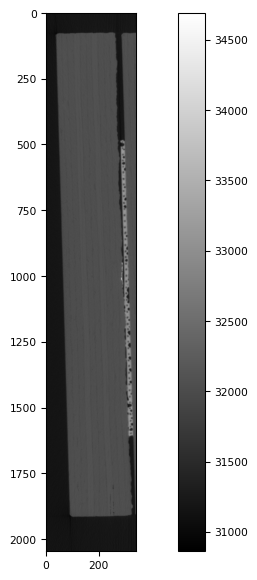

In [10]:
tifffile.imshow(b16, cmap="gray", vmin=b16.min(), vmax=b16.max())

In [9]:
tifffile.imwrite("./a.tif", b16)

In [12]:
hist, bins = np.histogram(b16, bins=256, range=(b16.min(), b16.max()))
# create a dataframe wiht this info
df = pd.DataFrame({'intensity': bins[:-1], 'count': hist})

In [14]:
# write df to a csv in the desktop
df.to_csv(r'C:\Users\jorge.cabrejas\Desktop\h.csv', index=False)


In [46]:
aux = (b16 - b16.min()) / (b16.max() - b16.min())
aux = (aux * 255)
hist, bins = np.histogram(aux, bins=256, range=(aux.min(), aux.max()))
aux = aux +  (127 - np.argmax(hist))
b8 = np.clip(aux, 0, 255).astype(np.uint8)

In [47]:
b8


array([[71, 67, 66, ..., 72, 70, 67],
       [70, 69, 65, ..., 74, 69, 66],
       [74, 67, 67, ..., 72, 68, 66],
       ...,
       [68, 73, 77, ..., 73, 74, 73],
       [70, 72, 75, ..., 74, 74, 73],
       [73, 68, 72, ..., 76, 75, 71]], dtype=uint8)

In [48]:
h8, bins8 = np.histogram(b8.astype(np.uint8), bins=256, )

In [49]:
#convert it to a dataframe
df8 = pd.DataFrame({'intensity': bins8[:-1], 'count': h8})
df8

,intensity,count
0,50.000000,3
1,50.800781,7
2,51.601562,7
3,52.402344,12
4,53.203125,22
...,...,...
251,250.996094,0
252,251.796875,0
253,252.597656,2
254,253.398438,1


In [30]:
cv2.calcHist([b8.astype(np.uint8)], [0], None, [256], [0, 256])

array([[3.0000e+00],
       [7.0000e+00],
       [7.0000e+00],
       [1.2000e+01],
       [2.2000e+01],
       [3.8000e+01],
       [5.0000e+01],
       [7.5000e+01],
       [1.1000e+02],
       [1.7000e+02],
       [2.7500e+02],
       [4.6700e+02],
       [7.5700e+02],
       [1.0820e+03],
       [1.9720e+03],
       [3.4430e+03],
       [5.9720e+03],
       [1.0269e+04],
       [1.7558e+04],
       [2.6774e+04],
       [3.3270e+04],
       [2.9884e+04],
       [2.4488e+04],
       [1.6016e+04],
       [1.0046e+04],
       [6.6460e+03],
       [4.4730e+03],
       [3.0530e+03],
       [2.1360e+03],
       [1.4410e+03],
       [1.1940e+03],
       [8.5900e+02],
       [7.5600e+02],
       [6.7100e+02],
       [6.4000e+02],
       [5.9400e+02],
       [4.9600e+02],
       [4.4900e+02],
       [4.7500e+02],
       [4.3900e+02],
       [4.2500e+02],
       [4.3800e+02],
       [4.0100e+02],
       [3.8900e+02],
       [3.9300e+02],
       [3.1800e+02],
       [3.8400e+02],
       [3.620

(<Figure size 988.8x604.8 with 2 Axes>,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x21d58e00050>)

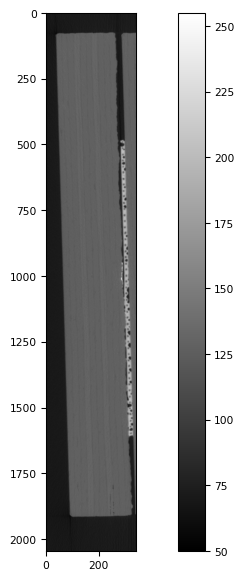

In [50]:
tifffile.imshow(b8, cmap="gray", vmin=b8.min(), vmax=b8.max())

In [51]:
tifffile.imsave("./b.tif", b8.astype(np.uint8))

C:\Users\jorge.cabrejas\AppData\Local\Temp\ipykernel_3144\2744893302.py:1: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tifffile.imsave("./b.tif", b8.astype(np.uint8))


In [35]:
df

,intensity,count
0,30863.000000,3
1,30877.957031,7
2,30892.914062,7
3,30907.871094,11
4,30922.828125,20
...,...,...
251,34617.214844,0
252,34632.171875,0
253,34647.128906,0
254,34662.085938,0


In [41]:
# reverse  df
df1 = df.sort_values(by='intensity', ascending=False)
df1

,intensity,count
255,34677.042969,2
254,34662.085938,0
253,34647.128906,0
252,34632.171875,0
251,34617.214844,0
...,...,...
4,30922.828125,20
3,30907.871094,11
2,30892.914062,7
1,30877.957031,7


In [44]:
a = df1.cumsum()

In [45]:
#save a to a csv
a.to_csv(r'C:\Users\jorge.cabrejas\Desktop\cumsum.csv', index=False)